In [10]:
# Install pgmpy library for Bayesian Network and inference methods
!pip install pgmpy

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


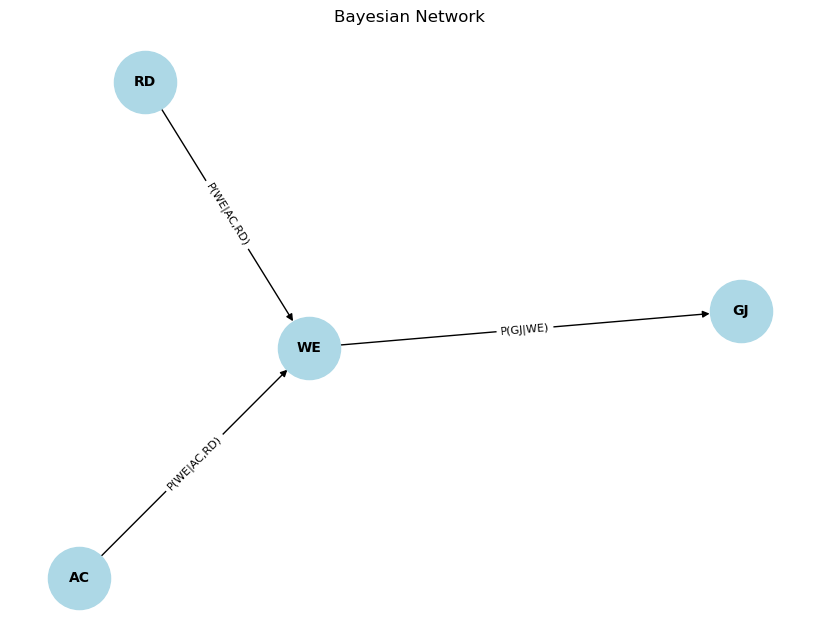

Joint Probability (Variable Elimination): 0.15


In [11]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('AC', 'WE'),  # AC influences WE
    ('RD', 'WE'),  # RD influences WE
    ('WE', 'GJ'),  # WE influences GJ
])

# Define Conditional Probability Distributions (CPDs)
cpd_ac = TabularCPD(variable='AC', variable_card=2, values=[[0.4], [0.6]])
cpd_rd = TabularCPD(variable='RD', variable_card=2, values=[[0.6], [0.4]])

cpd_we = TabularCPD(
    variable='WE', variable_card=2,
    values=[
        [0.9, 0.6, 0.5, 0.1],  # P(WE | AC, RD)
        [0.1, 0.4, 0.5, 0.9]
    ],
    evidence=['AC', 'RD'], evidence_card=[2, 2]
)

cpd_gj = TabularCPD(
    variable='GJ', variable_card=2,
    values=[
        [0.7, 0.1],  # P(GJ | WE)
        [0.3, 0.9]
    ],
    evidence=['WE'], evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_ac, cpd_rd, cpd_we, cpd_gj)

# Check if the model is valid
assert model.check_model()

# Visualize the Bayesian Network
plt.figure(figsize=(8, 6))
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")

# Add edge labels to describe the conditional dependencies
edge_labels = {
    ('AC', 'WE'): "P(WE|AC,RD)",
    ('RD', 'WE'): "P(WE|AC,RD)",
    ('WE', 'GJ'): "P(GJ|WE)"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Bayesian Network")
plt.show()

# Perform inference using Variable Elimination
inference = VariableElimination(model)

# Query the joint probability P(GJ, WE | AC=1, RD=0)
query_result = inference.query(
    variables=['GJ', 'WE'],
    evidence={'AC': 1, 'RD': 0}
)

# Extract and print the joint probability
joint_probability = query_result.values[1][0]
print(f"Joint Probability (Variable Elimination): {joint_probability:.2f}")